In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
import numpy as np

# Wczytanie i połączenie zbiorów

In [2]:
frames = [pd.read_csv('test.csv'), pd.read_csv('train.csv')]
passengers = pd.concat(frames, ignore_index=True)

In [3]:
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

# Uzupełnianie wartości NaN

In [4]:
passengers.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

In [5]:
passengers['Arrival Delay in Minutes'].value_counts()

0.0      72753
1.0       2747
2.0       2587
3.0       2442
4.0       2373
         ...  
436.0        1
454.0        1
315.0        1
418.0        1
369.0        1
Name: Arrival Delay in Minutes, Length: 472, dtype: int64

In [6]:
passengers['Arrival Delay in Minutes'].fillna(passengers['Departure Delay in Minutes'], inplace=True)

In [7]:
passengers.isna().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [8]:
passengers['Arrival Delay in Minutes'].value_counts()

0.0      72900
1.0       2758
2.0       2597
3.0       2447
4.0       2384
         ...  
333.0        1
458.0        1
413.0        1
729.0        1
369.0        1
Name: Arrival Delay in Minutes, Length: 475, dtype: int64

# Analiza zbioru danych

In [9]:
passengers.shape

(129880, 25)

In [10]:
passengers.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

<Axes: xlabel='Gender', ylabel='count'>

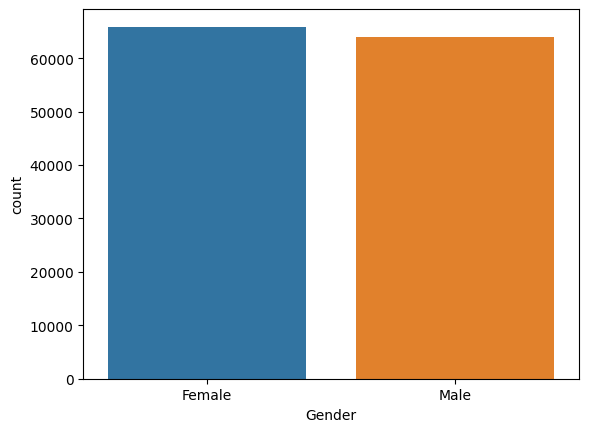

In [11]:
# Ilość podróży ze względu na płeć
sns.countplot(x='Gender', data=passengers)

<Axes: xlabel='Type of Travel', ylabel='count'>

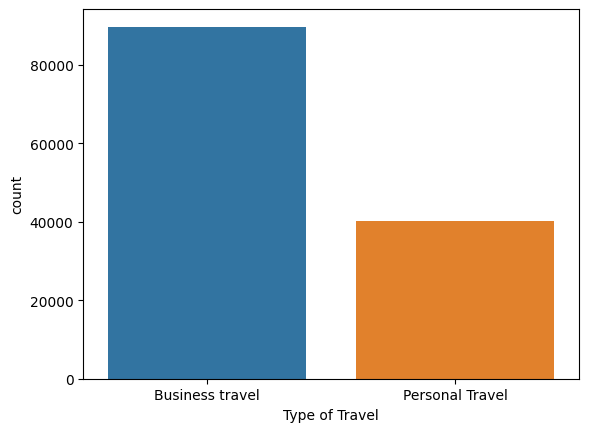

In [12]:
# Ilość podróży ze względu na rodzaj podróży
sns.countplot(x='Type of Travel', data=passengers)

<Axes: xlabel='Customer Type', ylabel='count'>

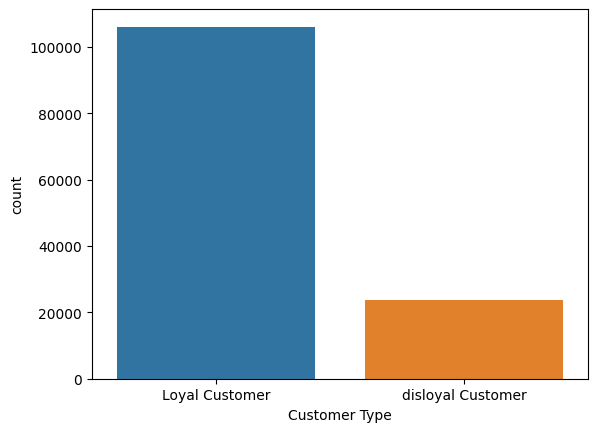

In [13]:
# Ilość podróży ze względu na rodzaj podróżnego
sns.countplot(x='Customer Type', data=passengers)

<Axes: xlabel='Customer Type', ylabel='Age'>

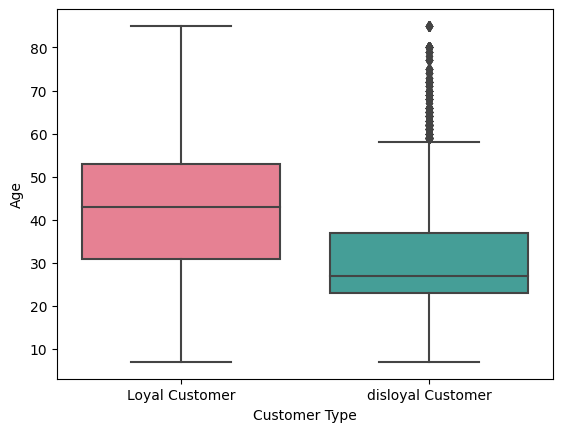

In [14]:
sns.boxplot(x = "Customer Type", y = "Age", palette = "husl", data = passengers)

Text(0.5, 1.0, 'Satisfaction')

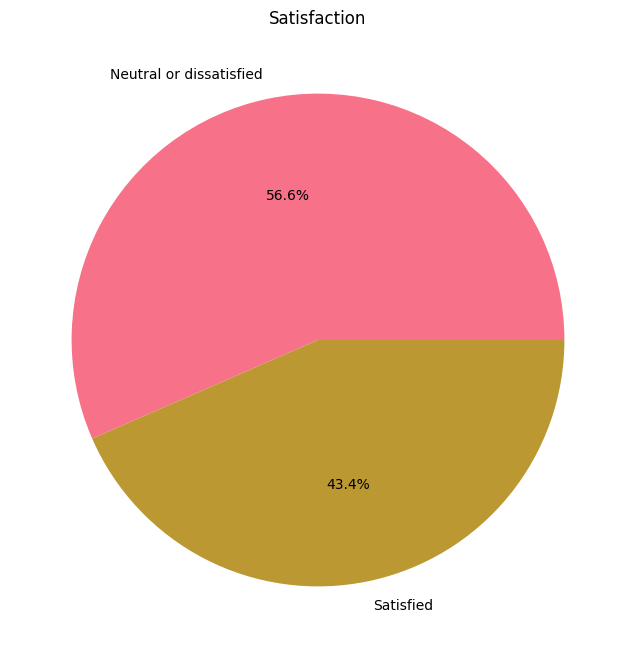

In [15]:
fig, ax = plt.subplots(figsize = (10,8))
ax.pie(passengers.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], autopct = '%1.1f%%', colors = sns.color_palette("husl"))
ax.set_title('Satisfaction')

Text(0.5, 1.0, 'Seat comfort')

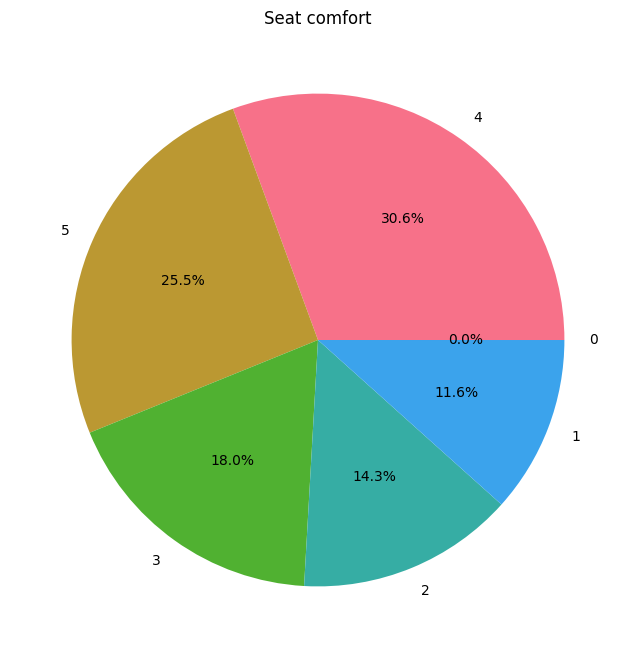

In [16]:
fig, ax = plt.subplots(figsize = (10,8))
ax.pie(passengers['Seat comfort'].value_counts(), labels = passengers['Seat comfort'].value_counts().index, autopct = '%1.1f%%', colors = sns.color_palette("husl"))
ax.set_title('Seat comfort')

Text(0.5, 1.0, 'Gate location')

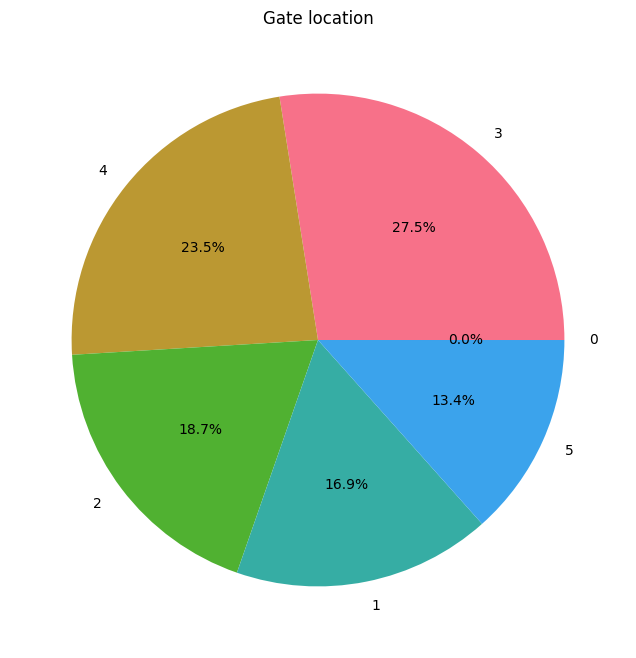

In [17]:
fig, ax = plt.subplots(figsize = (10,8))
ax.pie(passengers['Gate location'].value_counts(), labels = passengers['Gate location'].value_counts().index, autopct = '%1.1f%%', colors = sns.color_palette("husl"))
ax.set_title('Gate location')

Text(0.5, 1.0, 'Leg room service')

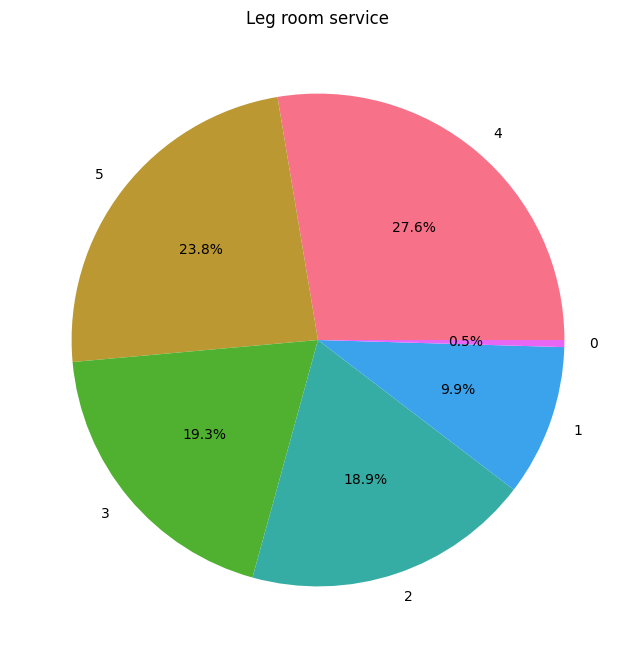

In [18]:
fig, ax = plt.subplots(figsize = (10,8))
ax.pie(passengers['Leg room service'].value_counts(), labels = passengers['Leg room service'].value_counts().index, autopct = '%1.1f%%', colors = sns.color_palette("husl"))
ax.set_title('Leg room service')

<Axes: xlabel='Class', ylabel='count'>

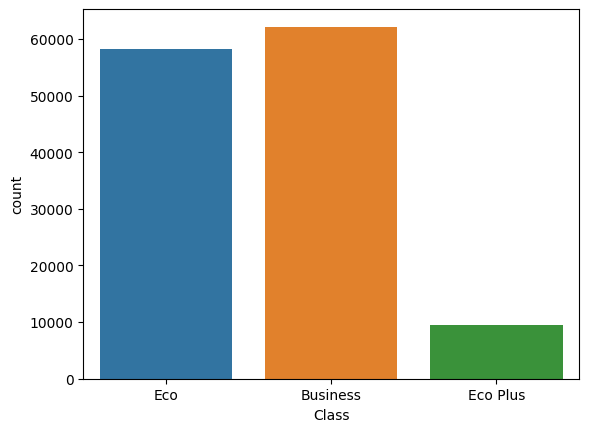

In [19]:
# Ilość podróży ze względu na rodzaj klasy
sns.countplot(x='Class', data=passengers)

# Dyskretyzacja danych

## Dyskretyzacja kolumn Type of Travel, Gender, Class, Customer Type oraz satisfaction

In [20]:
passengers.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [21]:
columns = ['Type of Travel', 'Gender', 'Class', 'Customer Type', 'satisfaction']
for column in columns:
  passengers[column] = passengers[column].astype('category')
  passengers[column] = passengers[column].cat.codes

In [22]:
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  int8   
 3   Customer Type                      129880 non-null  int8   
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  int8   
 6   Class                              129880 non-null  int8   
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

## Dyskretyzacja kolumn Age i Flight Distance

In [23]:
from sklearn.preprocessing import KBinsDiscretizer

In [24]:
passengers_d=KBinsDiscretizer(n_bins=6, # liczba przedziałów
                      encode='ordinal', # wyświetlanie tabeli w rzeczywistym formacie
                      strategy='uniform') # tworzenie przedziałów, aby miały taką samą szerokość przedziału wartości

In [25]:
passengers_d.fit(passengers[['Age','Flight Distance']])

KBinsDiscretizer(encode='ordinal', n_bins=6, strategy='uniform')

In [26]:
X_passengers_d=passengers_d.transform(passengers[['Age','Flight Distance']])

In [27]:
X_passengers_d

array([[3., 0.],
       [2., 3.],
       [1., 0.],
       ...,
       [1., 2.],
       [1., 1.],
       [1., 2.]])

In [28]:
X_d=passengers[['Age','Flight Distance']].copy()

In [29]:
X_d[:]=X_passengers_d

In [30]:
X_d.head()

,Age,Flight Distance
0,3,0
1,2,3
2,1,0
3,2,4
4,3,1


In [31]:
X_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   Age              129880 non-null  int64
 1   Flight Distance  129880 non-null  int64
dtypes: int64(2)
memory usage: 2.0 MB


In [32]:
passengers.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,0,0,52,0,1,160,5,4,...,5,5,5,5,2,5,5,50,44.0,1
1,1,90035,0,0,36,0,0,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,1
2,2,12360,1,1,20,0,1,192,2,0,...,2,4,1,3,2,2,2,0,0.0,0
3,3,77959,1,0,44,0,0,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,1
4,4,36875,0,0,49,0,1,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,1


In [33]:
passengers['Age'] = X_d['Age']
passengers['Flight Distance'] = X_d['Flight Distance']

In [34]:
passengers.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,0,0,3,0,1,0,5,4,...,5,5,5,5,2,5,5,50,44.0,1
1,1,90035,0,0,2,0,0,3,1,1,...,4,4,4,4,3,4,5,0,0.0,1
2,2,12360,1,1,1,0,1,0,2,0,...,2,4,1,3,2,2,2,0,0.0,0
3,3,77959,1,0,2,0,0,4,0,0,...,1,1,1,1,3,1,4,0,6.0,1
4,4,36875,0,0,3,0,1,1,2,3,...,2,2,2,2,4,2,4,0,20.0,1


## Dyskretyzacja kolumn Departure Delay in Minutes oraz Arrival Delay in Minutes

In [35]:
passengers['Departure Delay in Minutes category'] = pd.cut(x=passengers['Departure Delay in Minutes'],
                                                           bins = [-0.1, 1, 15, 60, 120, 600, 1592],
                                                           labels = [1, 2, 3, 4, 5, 6]).astype('int')

In [36]:
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 26 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Unnamed: 0                           129880 non-null  int64  
 1   id                                   129880 non-null  int64  
 2   Gender                               129880 non-null  int8   
 3   Customer Type                        129880 non-null  int8   
 4   Age                                  129880 non-null  int64  
 5   Type of Travel                       129880 non-null  int8   
 6   Class                                129880 non-null  int8   
 7   Flight Distance                      129880 non-null  int64  
 8   Inflight wifi service                129880 non-null  int64  
 9   Departure/Arrival time convenient    129880 non-null  int64  
 10  Ease of Online booking               129880 non-null  int64  
 11  Gate location

In [37]:
passengers['Arrival Delay in Minutes category'] = pd.cut(x=passengers['Arrival Delay in Minutes'],
                                                           bins = [-0.1, 1, 15, 60, 120, 600, 1584],
                                                           labels = [1, 2, 3, 4, 5, 6]).astype('int')

In [38]:
passengers.head(2)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Departure Delay in Minutes category,Arrival Delay in Minutes category
0,0,19556,0,0,3,0,1,0,5,4,...,5,5,2,5,5,50,44.0,1,3,3
1,1,90035,0,0,2,0,0,3,1,1,...,4,4,3,4,5,0,0.0,1,1,1


<Axes: >

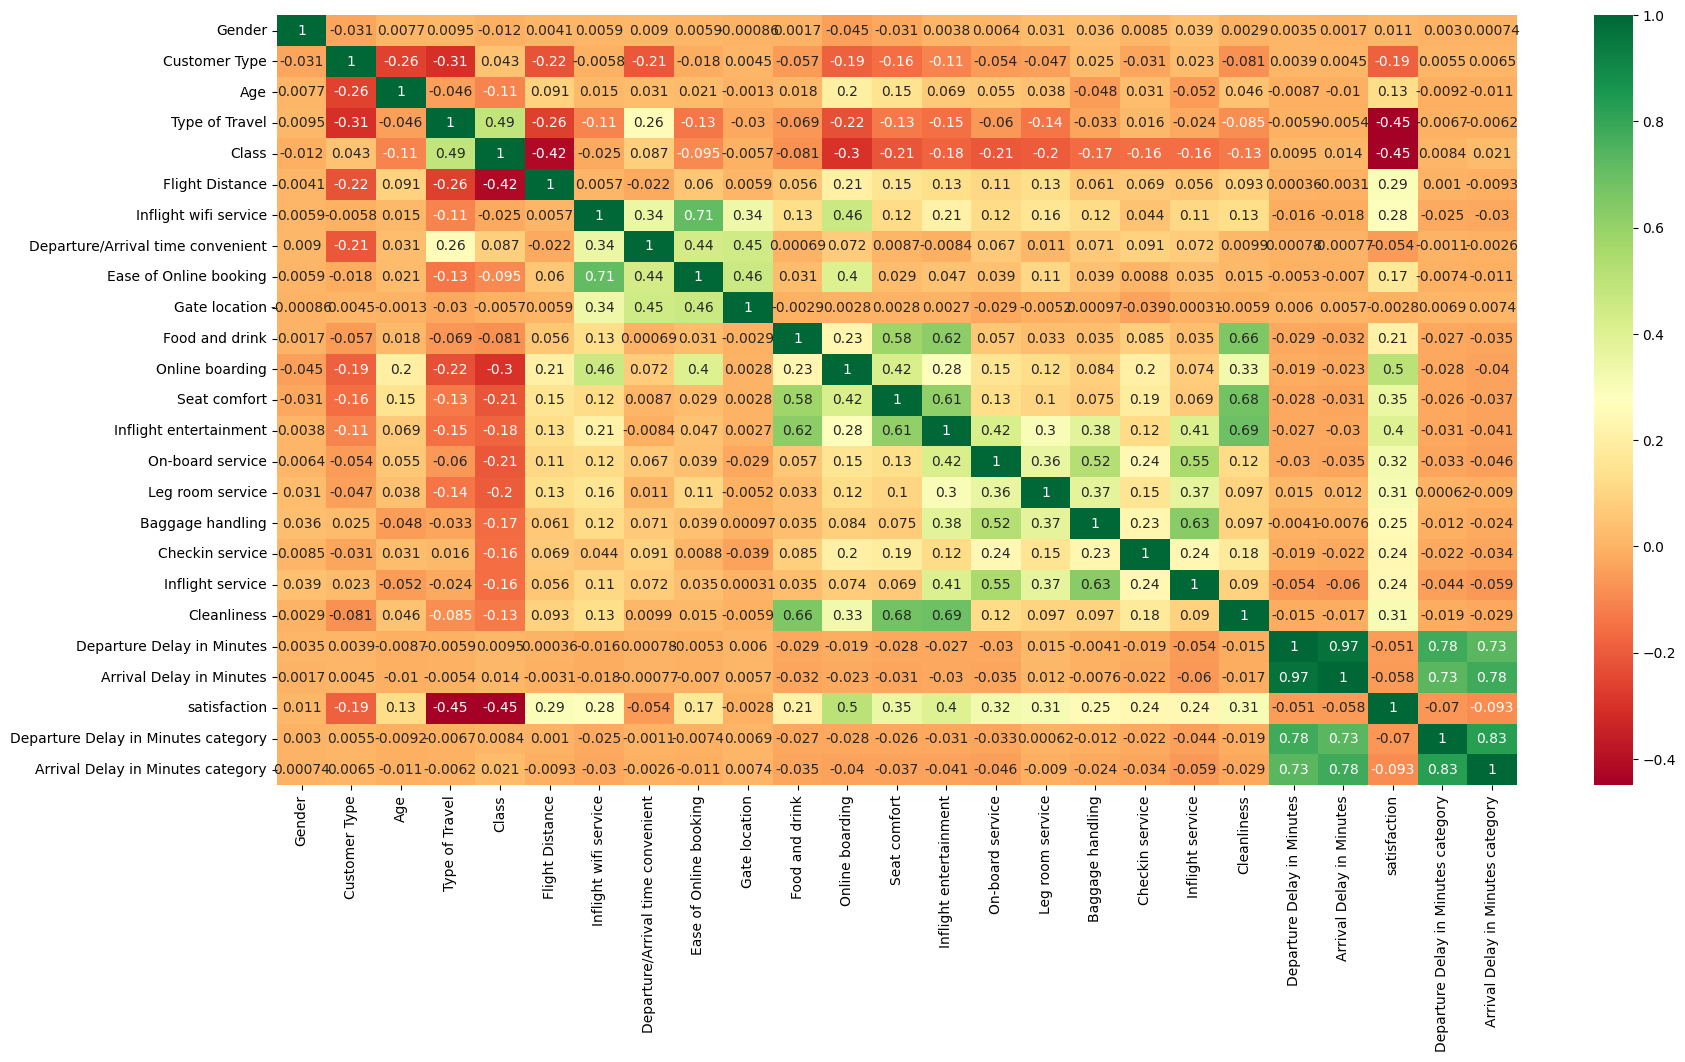

In [39]:
passengers_corr = passengers.iloc[:, 2:].corr()
plt.rcParams['figure.figsize'] = (20, 10)
sns.heatmap(passengers_corr, cmap='RdYlGn', annot=True)

# Tworzenie zbioru do modeli predykcyjnych

In [40]:
passengers.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Departure Delay in Minutes category',
       'Arrival Delay in Minutes category'],
      dtype='object')

In [41]:
passengers2= passengers[['Gender', 'Customer Type', 'Age', 'Type of Travel', 
                        'Class', 'Flight Distance', 'Inflight wifi service', 
                        'Departure/Arrival time convenient', 'Ease of Online booking', 
                        'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 
                        'Inflight entertainment', 'On-board service', 'Leg room service', 
                        'Baggage handling', 'Checkin service', 'Inflight service', 
                        'Cleanliness', 'satisfaction', 'Departure Delay in Minutes category', 
                        'Arrival Delay in Minutes category']]

In [42]:
passengers2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                               Non-Null Count   Dtype
---  ------                               --------------   -----
 0   Gender                               129880 non-null  int8 
 1   Customer Type                        129880 non-null  int8 
 2   Age                                  129880 non-null  int64
 3   Type of Travel                       129880 non-null  int8 
 4   Class                                129880 non-null  int8 
 5   Flight Distance                      129880 non-null  int64
 6   Inflight wifi service                129880 non-null  int64
 7   Departure/Arrival time convenient    129880 non-null  int64
 8   Ease of Online booking               129880 non-null  int64
 9   Gate location                        129880 non-null  int64
 10  Food and drink                       129880 non-null  int64
 11  Online boarding                      12

In [43]:
passengers3 = passengers2.sample(frac=0.20)

# Modele predykcyjne

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
passengers2.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'satisfaction', 'Departure Delay in Minutes category',
       'Arrival Delay in Minutes category'],
      dtype='object')

In [46]:
y = passengers3.pop('satisfaction')
X = passengers3.iloc[:, 2:]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

## Regresja logistyczna

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [49]:
model=LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [50]:
y_pred=model.predict(X_test)

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      2967
           1       0.84      0.81      0.82      2229

    accuracy                           0.85      5196
   macro avg       0.85      0.85      0.85      5196
weighted avg       0.85      0.85      0.85      5196



<Axes: >

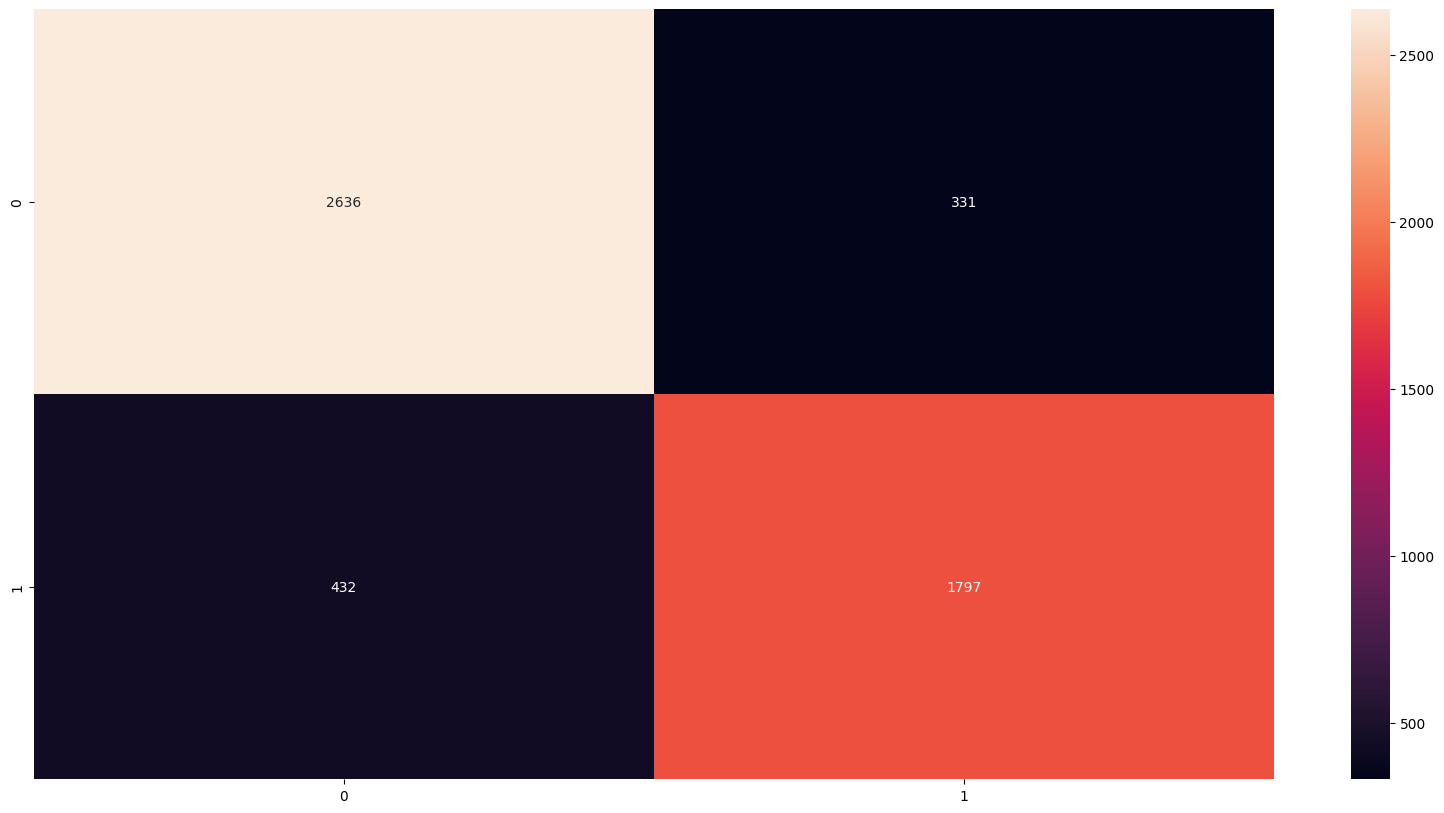

In [52]:
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

## SVM

In [53]:
from sklearn.svm import SVC

In [54]:
svm=SVC(kernel='poly', class_weight='balanced')
svm.fit(X_train, y_train)
pred=svm.predict(X)

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      2967
           1       0.84      0.81      0.82      2229

    accuracy                           0.85      5196
   macro avg       0.85      0.85      0.85      5196
weighted avg       0.85      0.85      0.85      5196



<Axes: >

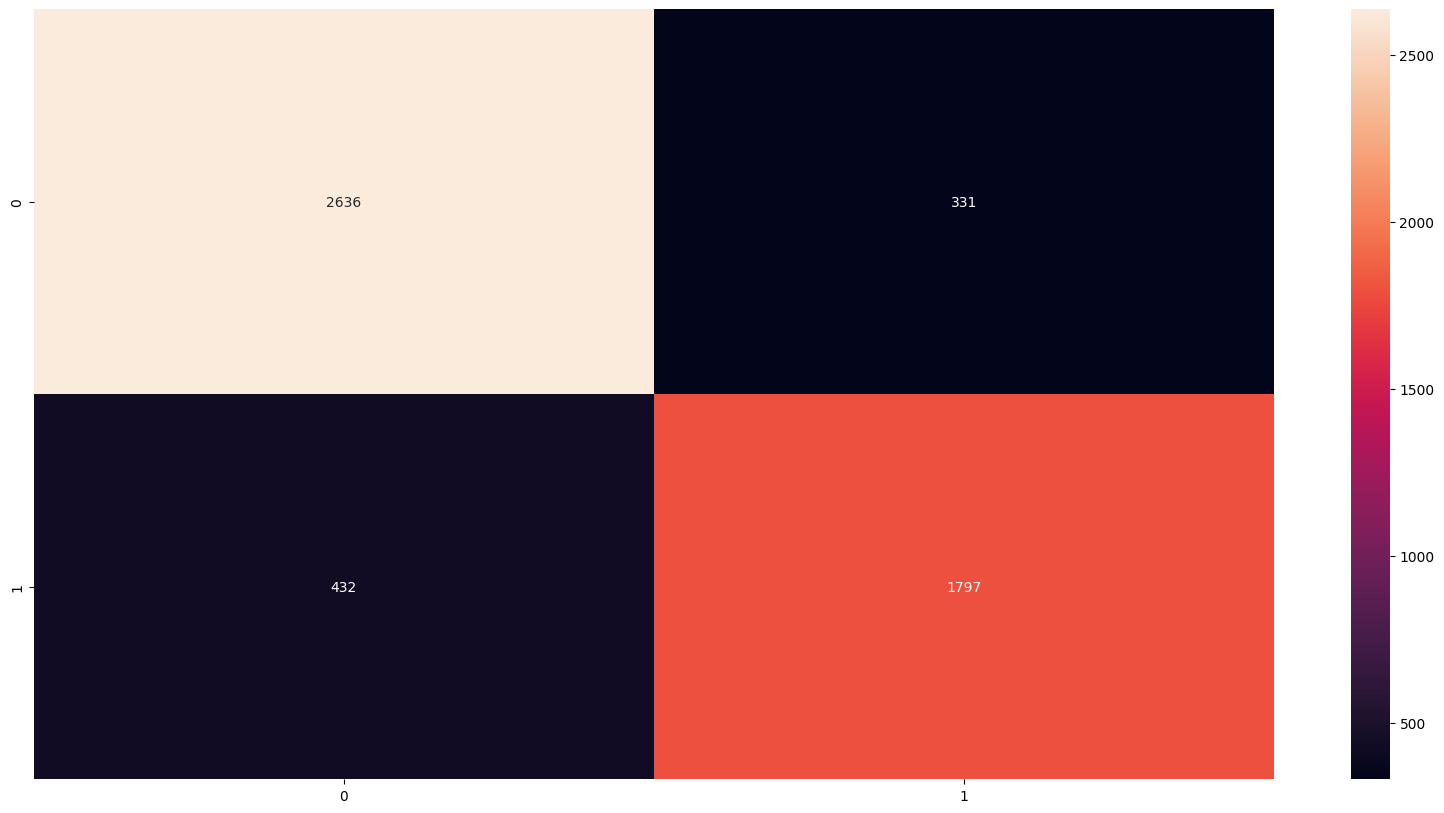

In [56]:
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [57]:
svm=SVC(kernel='linear', class_weight='balanced')
svm.fit(X_train, y_train)
pred=svm.predict(X)

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      2967
           1       0.84      0.81      0.82      2229

    accuracy                           0.85      5196
   macro avg       0.85      0.85      0.85      5196
weighted avg       0.85      0.85      0.85      5196



<Axes: >

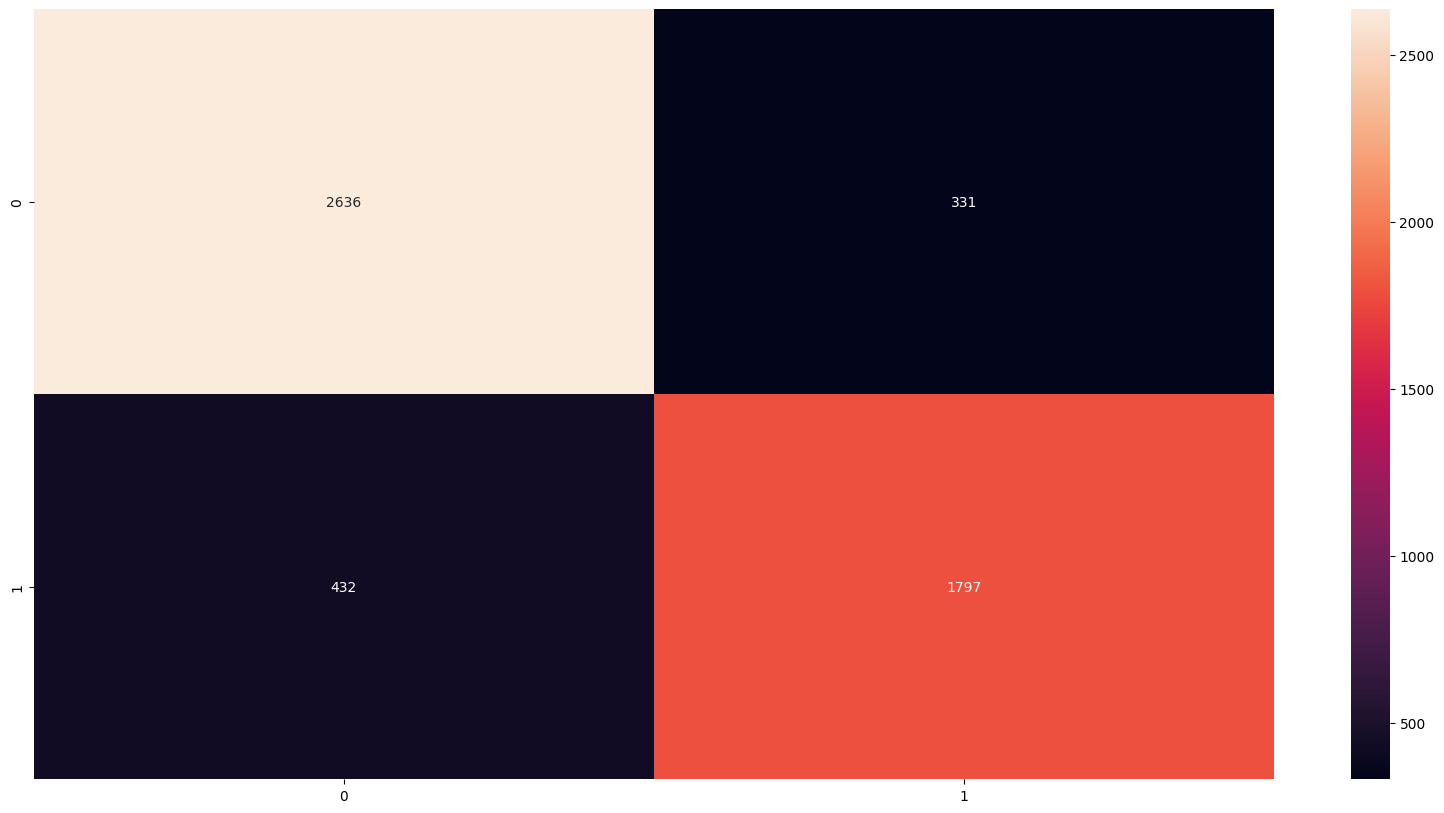

In [59]:
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

## KNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [143]:
knn=KNeighborsClassifier(n_neighbors=10, metric='minkowski')

In [144]:
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)

In [145]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2967
           1       0.94      0.82      0.88      2229

    accuracy                           0.90      5196
   macro avg       0.91      0.89      0.90      5196
weighted avg       0.90      0.90      0.90      5196



In [146]:
cm=confusion_matrix(y_test, y_pred)

<Axes: >

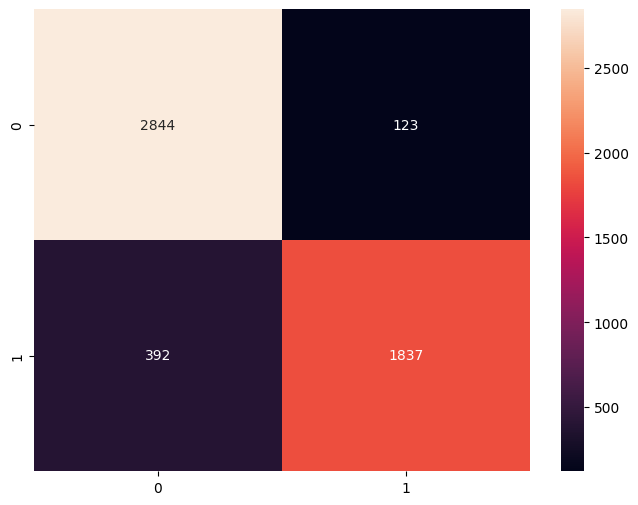

In [147]:
sns.heatmap(cm, annot=True, fmt='d')

In [148]:
knn=KNeighborsClassifier(n_neighbors=10, metric='chebyshev')
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87      2967
           1       0.91      0.69      0.79      2229

    accuracy                           0.84      5196
   macro avg       0.86      0.82      0.83      5196
weighted avg       0.85      0.84      0.83      5196



In [68]:
cm=confusion_matrix(y_test, y_pred)

<Axes: >

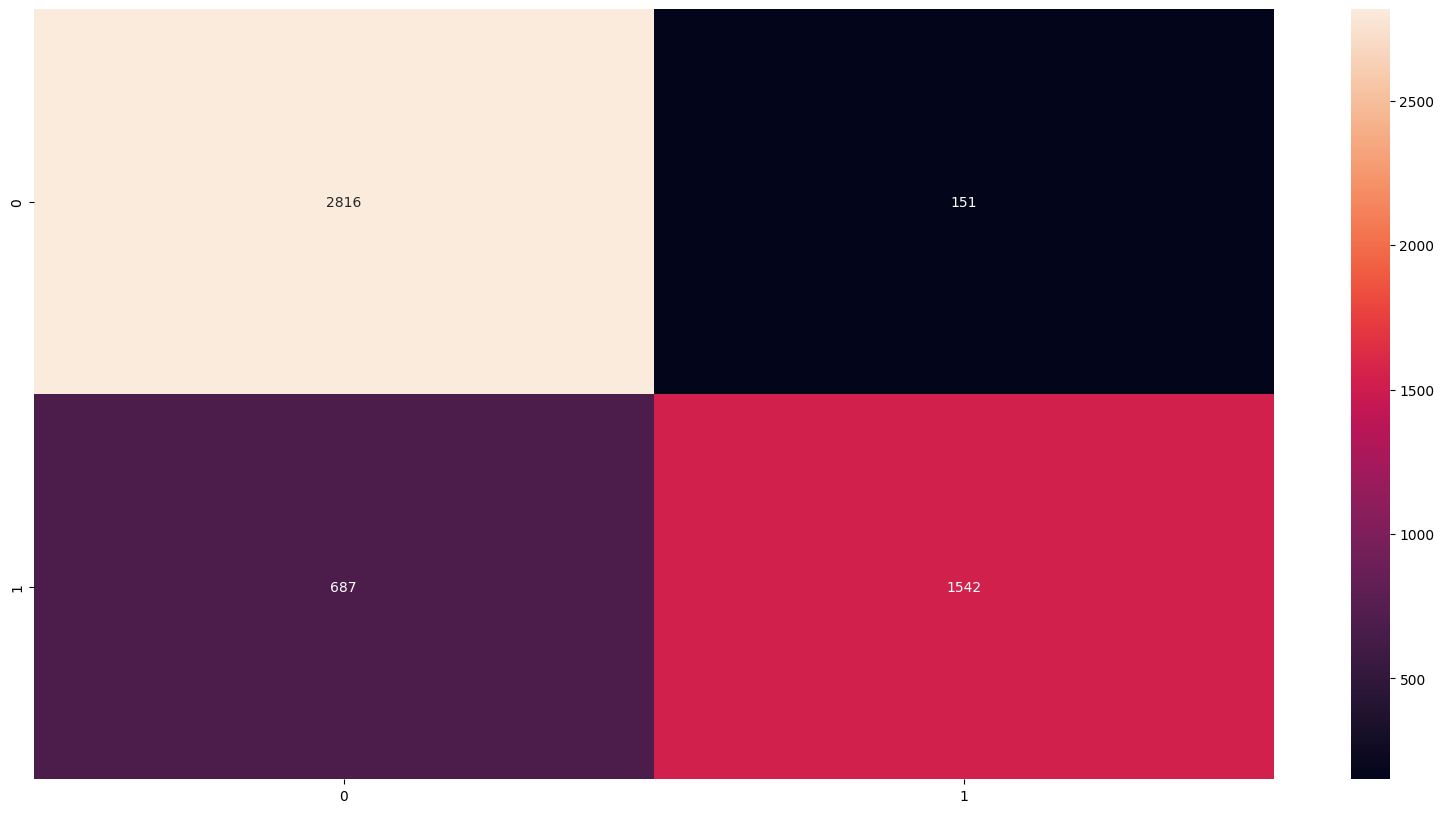

In [69]:
sns.heatmap(cm, annot=True, fmt='d')

## Naive Bayes

In [70]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [71]:
mnb=MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87      2967
           1       0.91      0.69      0.79      2229

    accuracy                           0.84      5196
   macro avg       0.86      0.82      0.83      5196
weighted avg       0.85      0.84      0.83      5196



In [73]:
cm=confusion_matrix(y_test, y_pred)

<Axes: >

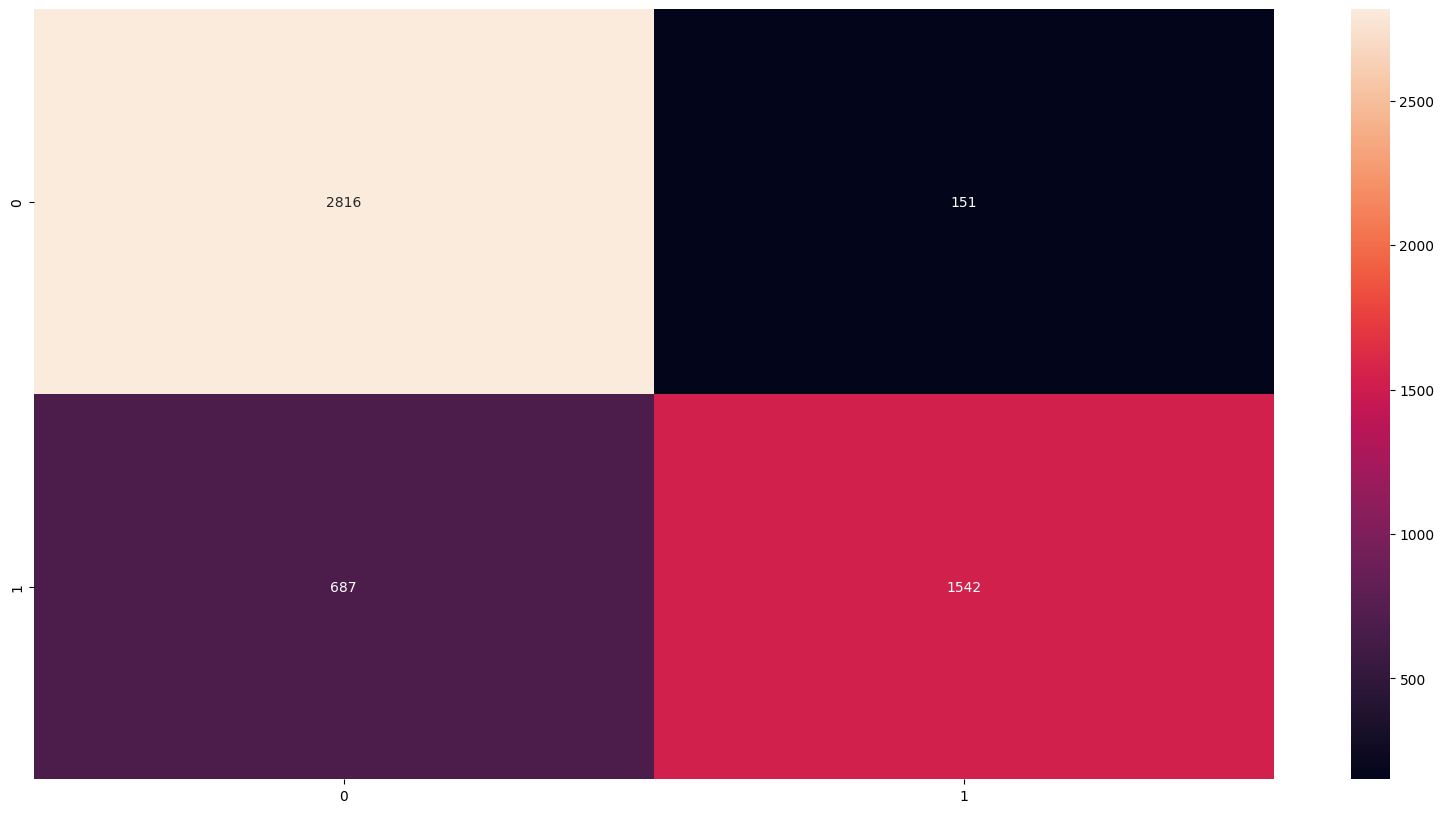

In [74]:
sns.heatmap(cm, annot=True, fmt='d')

In [75]:
gb=GaussianNB()
gb.fit(X_train, y_train)

GaussianNB()

In [76]:
y_pred=gb.predict(X_test)

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      2967
           1       0.83      0.81      0.82      2229

    accuracy                           0.85      5196
   macro avg       0.85      0.84      0.85      5196
weighted avg       0.85      0.85      0.85      5196



In [78]:
cm=confusion_matrix(y_test, y_pred)

<Axes: >

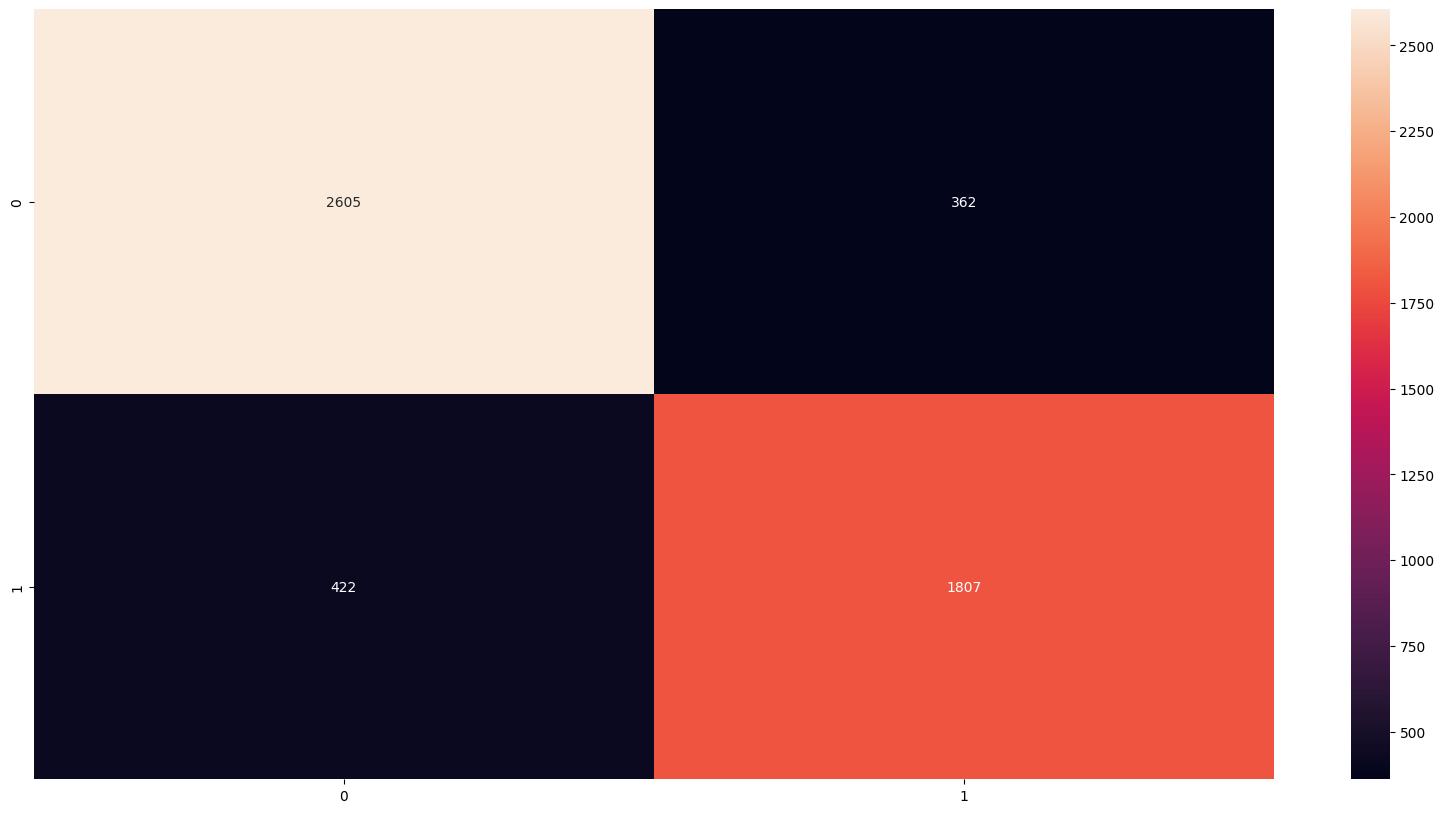

In [79]:
sns.heatmap(cm, annot=True, fmt='d')

In [80]:
bn=BernoulliNB()
bn.fit(X_train, y_train)

BernoulliNB()

In [81]:
y_pred=bn.predict(X_test)

In [82]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79      2967
           1       0.71      0.78      0.74      2229

    accuracy                           0.77      5196
   macro avg       0.77      0.77      0.77      5196
weighted avg       0.77      0.77      0.77      5196



<Axes: >

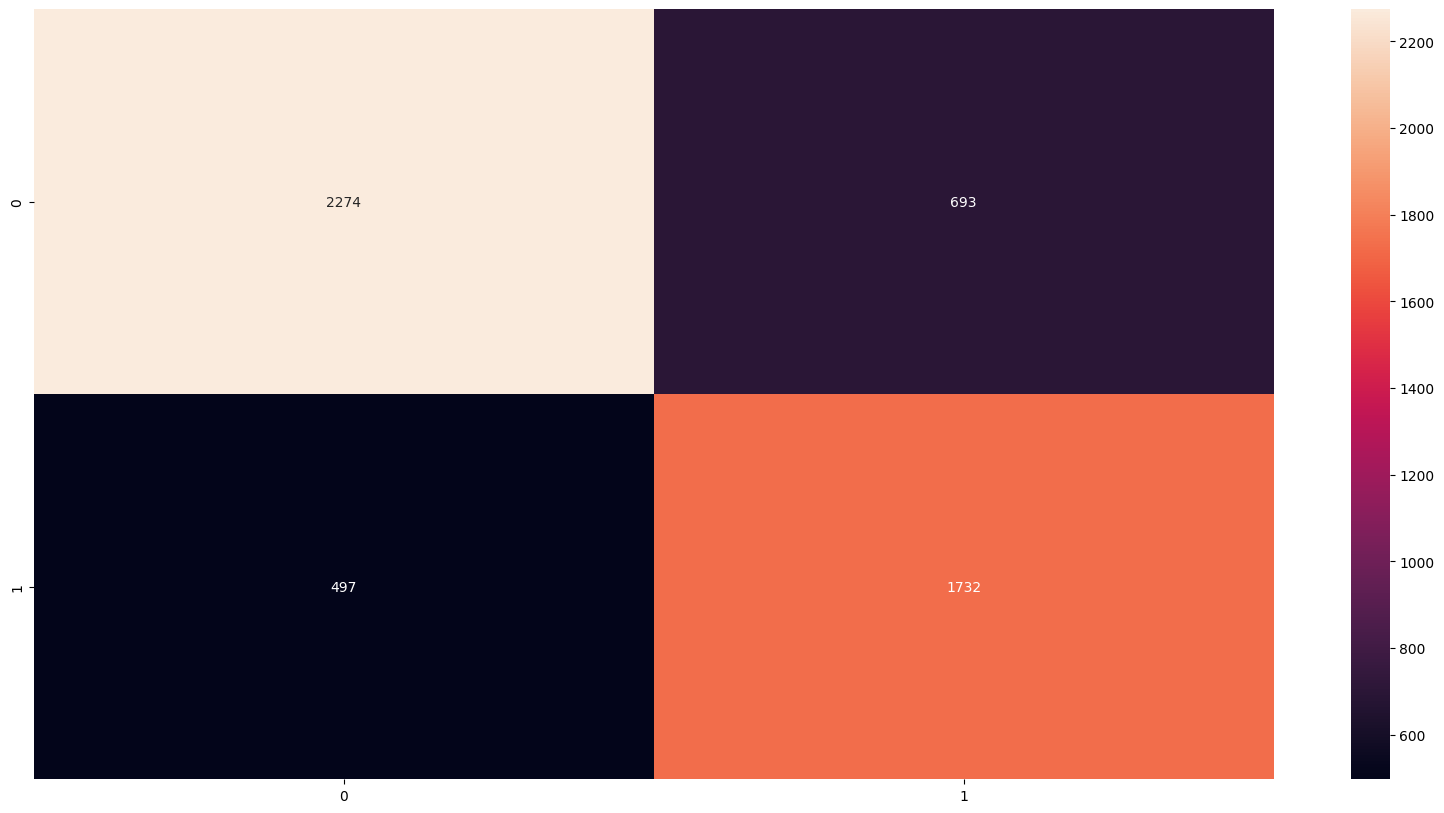

In [83]:
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

## Drzewo decyzyjne

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
dt = DecisionTreeClassifier()

In [86]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [87]:
y_pred_train=dt.predict(X_train)

In [88]:
y_pred_test=dt.predict(X_test)

In [89]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11722
           1       1.00      1.00      1.00      9058

    accuracy                           1.00     20780
   macro avg       1.00      1.00      1.00     20780
weighted avg       1.00      1.00      1.00     20780



In [90]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      2967
           1       0.91      0.92      0.91      2229

    accuracy                           0.93      5196
   macro avg       0.92      0.92      0.92      5196
weighted avg       0.93      0.93      0.93      5196



In [91]:
dt.get_depth()

29

In [92]:
dt.get_n_leaves()

1284

In [93]:
dt2=DecisionTreeClassifier(criterion='entropy', max_depth=3)
dt2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [94]:
y_train_pred=dt2.predict(X_train)
y_test_pred=dt2.predict(X_test)

In [95]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89     11722
           1       0.84      0.91      0.87      9058

    accuracy                           0.88     20780
   macro avg       0.88      0.89      0.88     20780
weighted avg       0.89      0.88      0.88     20780



In [96]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89      2967
           1       0.84      0.91      0.87      2229

    accuracy                           0.88      5196
   macro avg       0.88      0.89      0.88      5196
weighted avg       0.89      0.88      0.88      5196



## Zespoły klasyfikatorów

### Bagging z użyciem drzewa decyzyjnego

In [97]:
from sklearn.ensemble import BaggingClassifier

In [98]:
bagging_model=BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=123)

In [99]:
bagging_model.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=123)

In [100]:
y_pred_train=bagging_model.predict(X_train)
y_pred_test=bagging_model.predict(X_test)

In [101]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11722
           1       1.00      1.00      1.00      9058

    accuracy                           1.00     20780
   macro avg       1.00      1.00      1.00     20780
weighted avg       1.00      1.00      1.00     20780



In [102]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2967
           1       0.95      0.93      0.94      2229

    accuracy                           0.95      5196
   macro avg       0.95      0.95      0.95      5196
weighted avg       0.95      0.95      0.95      5196



### Bagging z użyciem SVC

In [103]:
bagg_model=BaggingClassifier(base_estimator=SVC(), n_estimators=50, random_state=123)

In [104]:
bagg_model.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=SVC(), n_estimators=50, random_state=123)

In [105]:
y_pred_train=bagg_model.predict(X_train)
y_pred_test=bagg_model.predict(X_test)

In [106]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11722
           1       0.94      0.92      0.93      9058

    accuracy                           0.94     20780
   macro avg       0.94      0.94      0.94     20780
weighted avg       0.94      0.94      0.94     20780



In [107]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2967
           1       0.93      0.91      0.92      2229

    accuracy                           0.93      5196
   macro avg       0.93      0.93      0.93      5196
weighted avg       0.93      0.93      0.93      5196



### Random Forest

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [109]:
rf_model=RandomForestClassifier(n_estimators=50, random_state=123, max_depth=10, min_samples_split= 5, min_samples_leaf= 1)

In [110]:
rf_model=RandomForestClassifier(n_estimators=50, random_state=123, max_depth=10, min_samples_split= 5, min_samples_leaf= 1)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=50,
                       random_state=123)

In [111]:
y_rf_train=rf_model.predict(X_train)
y_rf_test=rf_model.predict(X_test)

In [112]:
print(classification_report(y_train, y_rf_train))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     11722
           1       0.95      0.93      0.94      9058

    accuracy                           0.95     20780
   macro avg       0.95      0.95      0.95     20780
weighted avg       0.95      0.95      0.95     20780



In [113]:
print(classification_report(y_test, y_rf_test))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2967
           1       0.94      0.92      0.93      2229

    accuracy                           0.94      5196
   macro avg       0.94      0.94      0.94      5196
weighted avg       0.94      0.94      0.94      5196



## Grid Search

In [114]:
from sklearn.model_selection import GridSearchCV

In [115]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [116]:
rfc = RandomForestClassifier()

In [117]:
X

,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes category,Arrival Delay in Minutes category
109257,1,0,0,0,3,4,2,4,3,3,3,3,1,4,2,1,2,3,1,1
25525,2,0,0,3,3,1,1,1,3,4,3,3,3,3,3,2,3,1,2,1
25798,2,1,1,1,2,3,2,1,2,2,2,2,1,4,5,5,5,2,1,1
15154,2,0,1,0,4,4,4,4,4,4,4,4,2,3,1,4,1,4,1,1
17598,3,0,0,2,3,3,5,3,4,5,5,4,4,4,4,5,4,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17770,0,1,1,1,4,4,4,2,3,4,3,3,4,2,4,5,5,3,1,1
114036,0,1,1,1,3,4,3,4,2,3,2,2,3,1,3,2,4,2,2,2
44739,3,1,1,0,3,5,3,3,3,3,3,3,5,2,5,3,4,3,4,4
14968,4,0,1,0,2,5,5,5,2,2,2,2,4,5,2,3,3,2,1,1


In [118]:
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]})

In [119]:
print("Najlepsze parametry: ", grid_search.best_params_)
print("Najlepszy wynik: ", grid_search.best_score_)

Najlepsze parametry:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Najlepszy wynik:  0.9488931665062561


In [120]:
rf_model=RandomForestClassifier(n_estimators=100, random_state=123, max_depth=None, min_samples_split= 2, min_samples_leaf= 1)

In [121]:
rf_model=RandomForestClassifier(n_estimators=100, random_state=123, max_depth=None, min_samples_split= 2, min_samples_leaf= 1)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

In [122]:
y_rf_train=rf_model.predict(X_train)
y_rf_test=rf_model.predict(X_test)

In [123]:
print(classification_report(y_train, y_rf_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11722
           1       1.00      1.00      1.00      9058

    accuracy                           1.00     20780
   macro avg       1.00      1.00      1.00     20780
weighted avg       1.00      1.00      1.00     20780



In [124]:
print(classification_report(y_test, y_rf_test))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      2967
           1       0.96      0.92      0.94      2229

    accuracy                           0.95      5196
   macro avg       0.95      0.95      0.95      5196
weighted avg       0.95      0.95      0.95      5196



# Balansowanie danych

## Oversampling

In [125]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [126]:
over = RandomOverSampler(random_state=123)
X_train_over, y_train_over = over.fit_resample(X_train, y_train)

In [127]:
Counter(y_train_over)

Counter({0: 11722, 1: 11722})

In [128]:
model_over=LogisticRegression()
model_over.fit(X_train_over, y_train_over)

LogisticRegression()

In [129]:
y_pred_over=model_over.predict(X_test)

<Axes: >

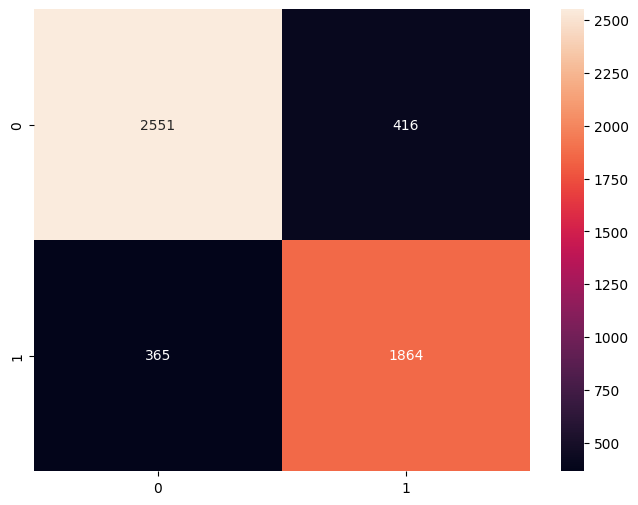

In [130]:
cm=confusion_matrix(y_test, y_pred_over)
plt.rcParams['figure.figsize'] = (8, 6)
sns.heatmap(cm, annot=True, fmt='d')

In [131]:
print(classification_report(y_test, y_pred_over))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      2967
           1       0.82      0.84      0.83      2229

    accuracy                           0.85      5196
   macro avg       0.85      0.85      0.85      5196
weighted avg       0.85      0.85      0.85      5196



## Undersampling

In [132]:
from imblearn.under_sampling import RandomUnderSampler

In [133]:
under=RandomUnderSampler(random_state=123)
X_train_under, y_train_under=under.fit_resample(X_train, y_train)

In [134]:
Counter(y_train_under)

Counter({0: 9058, 1: 9058})

In [135]:
model_under=LogisticRegression()
model_under.fit(X_train_under, y_train_under)

LogisticRegression()

In [136]:
y_pred_under=model_under.predict(X_test)

<Axes: >

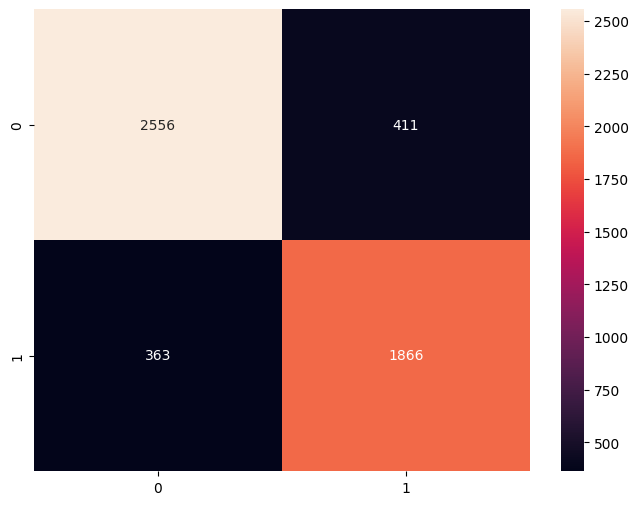

In [137]:
cm=confusion_matrix(y_test, y_pred_under)
sns.heatmap(cm, annot=True, fmt='d')

In [138]:
print(classification_report(y_test, y_pred_under))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2967
           1       0.82      0.84      0.83      2229

    accuracy                           0.85      5196
   macro avg       0.85      0.85      0.85      5196
weighted avg       0.85      0.85      0.85      5196



## Class Weight

In [139]:
model_weight=LogisticRegression(class_weight='balanced')
model_weight.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [140]:
y_pred_weight=model_weight.predict(X_test)

<Axes: >

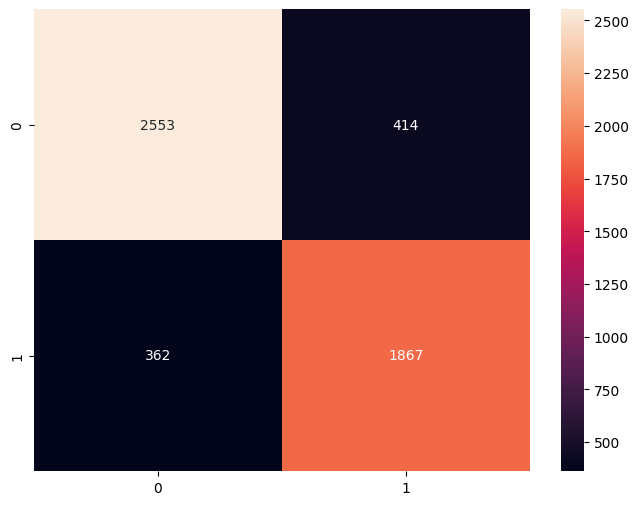

In [141]:
cm=confusion_matrix(y_test, y_pred_weight)
sns.heatmap(cm, annot=True, fmt='d')

In [142]:
print(classification_report(y_test, y_pred_weight))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2967
           1       0.82      0.84      0.83      2229

    accuracy                           0.85      5196
   macro avg       0.85      0.85      0.85      5196
weighted avg       0.85      0.85      0.85      5196

